In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../../../Cleaned Datasets/prices_cleaned.csv')

X = df.drop(columns=["Price"])
y = df["Price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = RandomForestRegressor(n_estimators = 150, max_features = 'sqrt', max_depth = 20, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse**.5
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Absolute Error: 0.2436156420669033
Mean Squared Error: 0.17592839360116308
Root Mean Squared Error: 0.4194381880577436
R-squared score: 0.8223108922351273


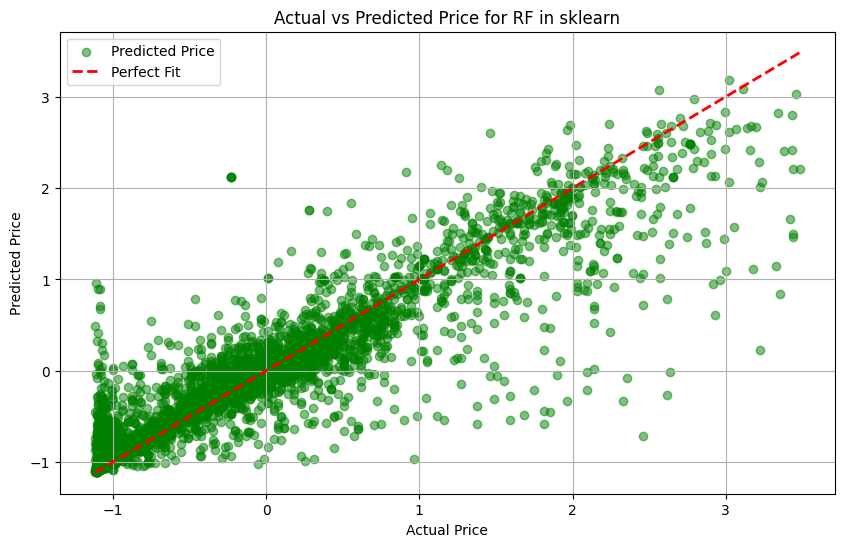

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted Price', alpha=0.5)
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--', lw=2,
         label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price for RF in sklearn')
plt.legend()
plt.grid(True)
plt.show()